In [1]:
from os import read
from graph_structure import GraphStructure
import geopandas as gpd
from tools import *

graph = read_object('graph_8_risk-watershed.pkl', Path('firemen/firepoint/2x2/train'))
raster = read_object('departement-01-ainrasterScale0.pkl', Path('../Target/firepoint/firemen/occurence/raster/2x2'))
raster_2 = read_object('departement-01-ainrasterScale8_risk-watershed.pkl', Path('firemen/firepoint/2x2/train/raster'))
regions = gpd.read_file('regions/firepoint/firemen/regions.geojson')

/home/caron/Bureau/.conda/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


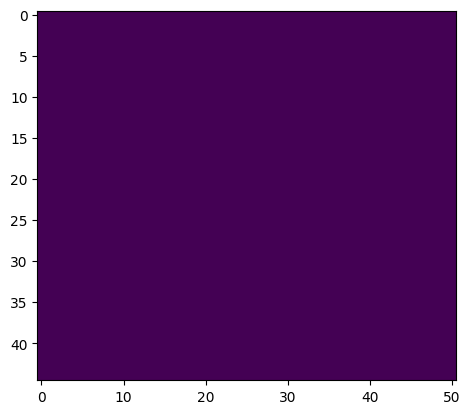

In [40]:
plt.imshow(raster_2 == 3)

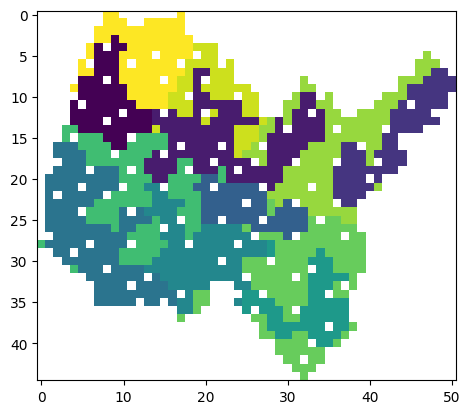

In [37]:
plt.imshow(raster_2)

In [26]:
np.unique(raster_2)

array([ 0.,  1.,  2.,  4.,  5.,  6.,  7.,  9., 10., 11., 12., 13., nan],
      dtype=float32)

In [5]:
np.unique(graph.oriIds[graph.departements == 'departement-01-ain']).shape

(1292,)

In [39]:
np.unique(graph.ids[graph.departements == 'departement-01-ain'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [7]:
np.intersect1d(np.unique(raster), np.unique(graph.oriIds[graph.departements == 'departement-01-ain']))

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.289e+03, 1.290e+03,
       1.291e+03])

In [8]:
us = []
for u in np.unique(graph.oriIds[graph.departements == 'departement-01-ain']):
    if u not in np.unique(raster):
        us.append(u)

<Axes: >

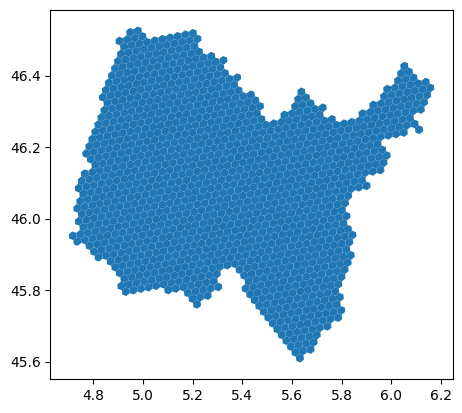

In [9]:
regions_ain = regions[regions['departement'] == 'departement-01-ain']
regions_ain.plot()

In [10]:
regions_ain.scale0

0          0
1          1
2          2
3          3
4          4
        ... 
1287    1287
1288    1288
1289    1289
1290    1290
1291    1291
Name: scale0, Length: 1292, dtype: int64

<Axes: >

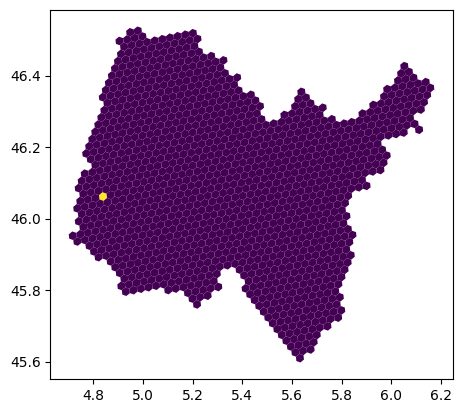

In [11]:
regions_ain['this'] = 0
regions_ain.loc[regions_ain[regions_ain['scale0'] == 29].index, 'this'] = 1
regions_ain.plot(column='this', vmin=0, vmax=1)

In [12]:
np.unique(graph.ids[graph.departements == 'departement-01-ain'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

<Axes: >

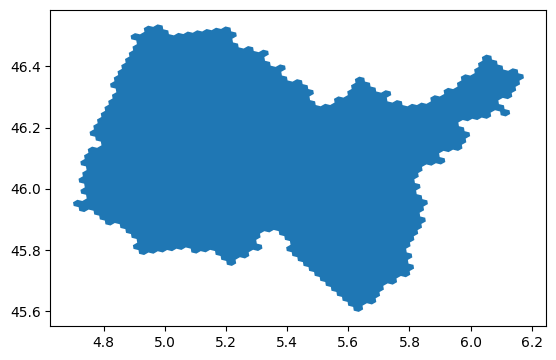

In [13]:
from shapely import unary_union

geo = pd.DataFrame(pd.Series(unary_union(graph.oriGeometry[graph.departements == 'departement-01-ain'])))
geo.rename({0: 'geometry'}, inplace=True, axis=1)
geo = gpd.GeoDataFrame(geo, geometry=geo.geometry)
geo.plot()

<Axes: >

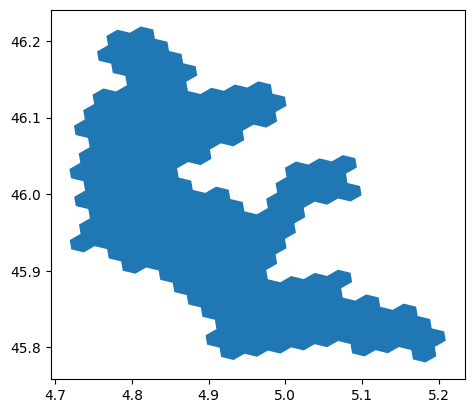

In [43]:
geo = pd.DataFrame(pd.Series(unary_union(graph.oriGeometry[graph.ids == 5])))
geo.rename({0: 'geometry'}, inplace=True, axis=1)
geo = gpd.GeoDataFrame(geo, geometry=geo.geometry)
geo.plot()

In [24]:
geo.columns

Index([0], dtype='int64')